In this file, the goal is to plot, for each region, the reconstruction error as a function of log ((Nb of voxels in the right hemisphere)/ (Nb of voxels in the left hemsiphere) )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from glob import glob
from soma import aims

In [3]:
PEPR_left = glob("/neurospin/dico/data/human/PEPR_Marseille/derivatives/deep_folding-2025/skeletons/2mm/L/*.nii.gz")

In [4]:
PEPR_right = glob("/neurospin/dico/data/human/PEPR_Marseille/derivatives/deep_folding-2025/skeletons/2mm/R/*.nii.gz")

In [5]:
len(PEPR_left)

1035

In [6]:
len(PEPR_right)

1035

On met les fichiers correspondant dans le même ordre

In [7]:

def key_without_side(path):
    name = os.path.basename(path)
    return name[1:]  # enlève le R ou le L initial

In [8]:
def sorted_file(L_right, L_left):
    # Dictionnaires clé → fichier
    right_dict = {key_without_side(f): f for f in L_right}
    left_dict = {key_without_side(f): f for f in L_left}

    # Clés communes
    common_keys = sorted(set(right_dict) & set(left_dict))

    # Listes alignées
    L_right_sorted = [right_dict[k] for k in common_keys]
    L_left_sorted  = [left_dict[k] for k in common_keys]

    return L_right_sorted, L_left_sorted, common_keys

In [9]:
PEPR_right, PEPR_left, common_keys_PEPR = sorted_file(PEPR_right, PEPR_left)

In [10]:
common_keys_PEPR

['resampled_skeleton_0001BAR_27112016.nii.gz',
 'resampled_skeleton_0001BUC_17062014.nii.gz',
 'resampled_skeleton_0001FLO_02052012.nii.gz',
 'resampled_skeleton_0001FRE_16032015.nii.gz',
 'resampled_skeleton_0001GRE_25112014.nii.gz',
 'resampled_skeleton_0001HUH_07042016.nii.gz',
 'resampled_skeleton_0001HUH_30112018.nii.gz',
 'resampled_skeleton_0001KCH_08042010.nii.gz',
 'resampled_skeleton_0001LYO_19012015.nii.gz',
 'resampled_skeleton_0001MAR_24092015.nii.gz',
 'resampled_skeleton_0001MIL_13092016.nii.gz',
 'resampled_skeleton_0001MNI_15042010.nii.gz',
 'resampled_skeleton_0001NAN_31082015.nii.gz',
 'resampled_skeleton_0001PLS_14032011.nii.gz',
 'resampled_skeleton_0001REN_03062013.nii.gz',
 'resampled_skeleton_0001ROT_02022012.nii.gz',
 'resampled_skeleton_0001STA_09072015.nii.gz',
 'resampled_skeleton_0001STR_14032016.nii.gz',
 'resampled_skeleton_0001VAL_28022017.nii.gz',
 'resampled_skeleton_0001YUQ_25082016.nii.gz',
 'resampled_skeleton_0002BAR_13022017.nii.gz',
 'resampled_s

In [11]:
common_keys_PEPR = [
    s.replace("resampled_skeleton_", "").replace(".nii.gz", "")
    for s in common_keys_PEPR
]
common_keys_PEPR

['0001BAR_27112016',
 '0001BUC_17062014',
 '0001FLO_02052012',
 '0001FRE_16032015',
 '0001GRE_25112014',
 '0001HUH_07042016',
 '0001HUH_30112018',
 '0001KCH_08042010',
 '0001LYO_19012015',
 '0001MAR_24092015',
 '0001MIL_13092016',
 '0001MNI_15042010',
 '0001NAN_31082015',
 '0001PLS_14032011',
 '0001REN_03062013',
 '0001ROT_02022012',
 '0001STA_09072015',
 '0001STR_14032016',
 '0001VAL_28022017',
 '0001YUQ_25082016',
 '0002BAR_13022017',
 '0002CAN_03112016',
 '0002FLO_14032016',
 '0002FRE_24092015',
 '0002GRE_28042015',
 '0002HUH_16052016',
 '0002KCH_04102012',
 '0002LYO_28042015',
 '0002MAR_08102015',
 '0002MIL_21042015',
 '0002MNI_16112011',
 '0002NEC_07072015',
 '0002NEC_27092016',
 '0002REN_15102013',
 '0002ROT_09092013',
 '0002ROT_17032015',
 '0002STA_01062015',
 '0002STR_02052016',
 '0002VAL_28032017',
 '0002YUQ_06092016',
 '0003BAR_28022017',
 '0003BUC_04102014',
 '0003FLO_19092012',
 '0003FRE_18112015',
 '0003GRE_12052015',
 '0003HUH_15012015',
 '0003LYO_05052015',
 '0003MAR_191

In [12]:
def erreur_ordonnée(error_file, common_key):
    error_file = error_file.set_index(error_file.columns[0])
    r=[]
    for a in common_key:
        r.append(error_file.loc[a])
    return r

In [13]:
value_PEPR_right =[]
value_PEPR_left =[]

In [14]:
for a in PEPR_right:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_PEPR_right.append(r)

In [15]:
for a in PEPR_left:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_PEPR_left.append(r)

Pour UKB et hcp

In [16]:
UKB_left= glob("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/skeletons/2mm/L/*.nii.gz")
UKB_right= glob("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/skeletons/2mm/R/*.nii.gz")

In [17]:
def sorted_UKB_file(L_right, L_left):
    # Dictionnaires clé → fichier
    right_dict = {key_without_side(f): f for f in L_right}
    left_dict = {key_without_side(f): f for f in L_left}

    # Clés communes
    common_keys = sorted(set(right_dict) & set(left_dict))

    # Listes alignées
    L_right_sorted = [right_dict[k] for k in common_keys]
    L_left_sorted  = [left_dict[k] for k in common_keys]

    return L_right_sorted[:1000], L_left_sorted[:1000], common_keys[:1000]

In [18]:
UKB_right, UKB_left, common_keys_UKB = sorted_UKB_file(UKB_right, UKB_left)


In [19]:
common_keys_UKB

['resampled_skeleton_sub-1000021.nii.gz',
 'resampled_skeleton_sub-1000325.nii.gz',
 'resampled_skeleton_sub-1000458.nii.gz',
 'resampled_skeleton_sub-1000575.nii.gz',
 'resampled_skeleton_sub-1000606.nii.gz',
 'resampled_skeleton_sub-1000715.nii.gz',
 'resampled_skeleton_sub-1000963.nii.gz',
 'resampled_skeleton_sub-1001107.nii.gz',
 'resampled_skeleton_sub-1001393.nii.gz',
 'resampled_skeleton_sub-1001428.nii.gz',
 'resampled_skeleton_sub-1001444.nii.gz',
 'resampled_skeleton_sub-1001692.nii.gz',
 'resampled_skeleton_sub-1001942.nii.gz',
 'resampled_skeleton_sub-1002188.nii.gz',
 'resampled_skeleton_sub-1002539.nii.gz',
 'resampled_skeleton_sub-1002584.nii.gz',
 'resampled_skeleton_sub-1002622.nii.gz',
 'resampled_skeleton_sub-1002767.nii.gz',
 'resampled_skeleton_sub-1002817.nii.gz',
 'resampled_skeleton_sub-1002872.nii.gz',
 'resampled_skeleton_sub-1002986.nii.gz',
 'resampled_skeleton_sub-1003059.nii.gz',
 'resampled_skeleton_sub-1003113.nii.gz',
 'resampled_skeleton_sub-1003262.n

In [20]:
common_keys_UKB = [
    s.replace("resampled_skeleton_sub-", "").replace(".nii.gz", "")
    for s in common_keys_UKB
]
common_keys_UKB

['1000021',
 '1000325',
 '1000458',
 '1000575',
 '1000606',
 '1000715',
 '1000963',
 '1001107',
 '1001393',
 '1001428',
 '1001444',
 '1001692',
 '1001942',
 '1002188',
 '1002539',
 '1002584',
 '1002622',
 '1002767',
 '1002817',
 '1002872',
 '1002986',
 '1003059',
 '1003113',
 '1003262',
 '1003286',
 '1003295',
 '1003425',
 '1003454',
 '1003526',
 '1003534',
 '1003705',
 '1003784',
 '1004133',
 '1004170',
 '1004207',
 '1004339',
 '1004594',
 '1004717',
 '1004756',
 '1004791',
 '1004813',
 '1004881',
 '1005028',
 '1005072',
 '1005290',
 '1005312',
 '1005341',
 '1005443',
 '1005514',
 '1005700',
 '1006013',
 '1006097',
 '1006112',
 '1006217',
 '1006263',
 '1006308',
 '1006329',
 '1006588',
 '1006724',
 '1006940',
 '1007047',
 '1007086',
 '1007175',
 '1007954',
 '1007976',
 '1008147',
 '1008418',
 '1008582',
 '1008889',
 '1010220',
 '1010517',
 '1011197',
 '1011511',
 '1011534',
 '1011542',
 '1011771',
 '1012112',
 '1012123',
 '1012329',
 '1012331',
 '1012655',
 '1012918',
 '1012940',
 '10

In [21]:
value_UKB_right =[]
value_UKB_left =[]

In [22]:
for a in UKB_right:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_UKB_right.append(r)

In [23]:
for a in UKB_left:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_UKB_left.append(r)

In [24]:
hcp_left= glob("/neurospin/dico/data/deep_folding/current/datasets/hcp/skeletons/2mm/L/*.nii.gz")
hcp_right= glob("/neurospin/dico/data/deep_folding/current/datasets/hcp/skeletons/2mm/R/*.nii.gz")

In [25]:
hcp_right, hcp_left , common_keys_hcp= sorted_UKB_file(hcp_right, hcp_left)


In [26]:
common_keys_hcp

['resampled_skeleton_100206.nii.gz',
 'resampled_skeleton_100307.nii.gz',
 'resampled_skeleton_100408.nii.gz',
 'resampled_skeleton_100610.nii.gz',
 'resampled_skeleton_101006.nii.gz',
 'resampled_skeleton_101107.nii.gz',
 'resampled_skeleton_101309.nii.gz',
 'resampled_skeleton_101410.nii.gz',
 'resampled_skeleton_101915.nii.gz',
 'resampled_skeleton_102008.nii.gz',
 'resampled_skeleton_102109.nii.gz',
 'resampled_skeleton_102311.nii.gz',
 'resampled_skeleton_102513.nii.gz',
 'resampled_skeleton_102614.nii.gz',
 'resampled_skeleton_102715.nii.gz',
 'resampled_skeleton_102816.nii.gz',
 'resampled_skeleton_103010.nii.gz',
 'resampled_skeleton_103111.nii.gz',
 'resampled_skeleton_103212.nii.gz',
 'resampled_skeleton_103414.nii.gz',
 'resampled_skeleton_103515.nii.gz',
 'resampled_skeleton_103818.nii.gz',
 'resampled_skeleton_104012.nii.gz',
 'resampled_skeleton_104416.nii.gz',
 'resampled_skeleton_104820.nii.gz',
 'resampled_skeleton_105014.nii.gz',
 'resampled_skeleton_105115.nii.gz',
 

In [27]:
common_keys_hcp = [
    s.replace("resampled_skeleton_", "").replace(".nii.gz", "")
    for s in common_keys_hcp
]
common_keys_hcp

['100206',
 '100307',
 '100408',
 '100610',
 '101006',
 '101107',
 '101309',
 '101410',
 '101915',
 '102008',
 '102109',
 '102311',
 '102513',
 '102614',
 '102715',
 '102816',
 '103010',
 '103111',
 '103212',
 '103414',
 '103515',
 '103818',
 '104012',
 '104416',
 '104820',
 '105014',
 '105115',
 '105216',
 '105620',
 '105923',
 '106016',
 '106319',
 '106521',
 '106824',
 '107018',
 '107220',
 '107321',
 '107422',
 '107725',
 '108020',
 '108121',
 '108222',
 '108323',
 '108525',
 '108828',
 '109123',
 '109325',
 '109830',
 '110007',
 '110411',
 '110613',
 '111009',
 '111211',
 '111312',
 '111413',
 '111514',
 '111716',
 '112112',
 '112314',
 '112516',
 '112819',
 '112920',
 '113215',
 '113316',
 '113417',
 '113619',
 '113821',
 '113922',
 '114116',
 '114217',
 '114318',
 '114419',
 '114621',
 '114823',
 '114924',
 '115017',
 '115219',
 '115320',
 '115724',
 '115825',
 '116120',
 '116221',
 '116423',
 '116524',
 '116726',
 '117021',
 '117122',
 '117324',
 '117728',
 '117930',
 '118023',

In [28]:
value_hcp_right =[]
value_hcp_left =[]

In [29]:
for a in hcp_right:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_hcp_right.append(r)

In [30]:
for a in hcp_left:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_hcp_left.append(r)

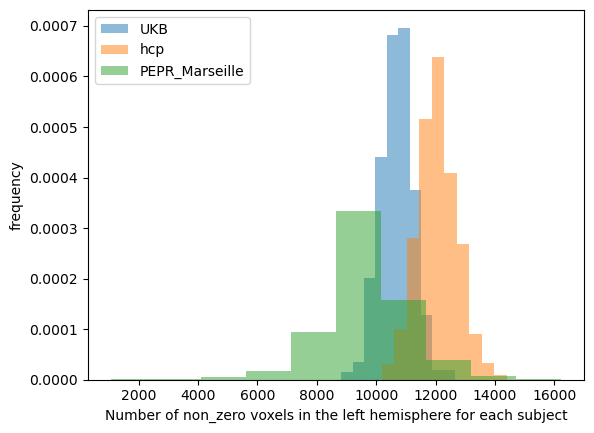

In [31]:
plt.hist(value_UKB_left, label="UKB", alpha=0.5, density=True)
plt.hist(value_hcp_left, label="hcp", alpha=0.5, density=True)
plt.hist(value_PEPR_left, label="PEPR_Marseille", alpha=0.5, density=True)
plt.xlabel("Number of non_zero voxels in the left hemisphere for each subject")
plt.ylabel("frequency")
plt.legend()
plt.show()

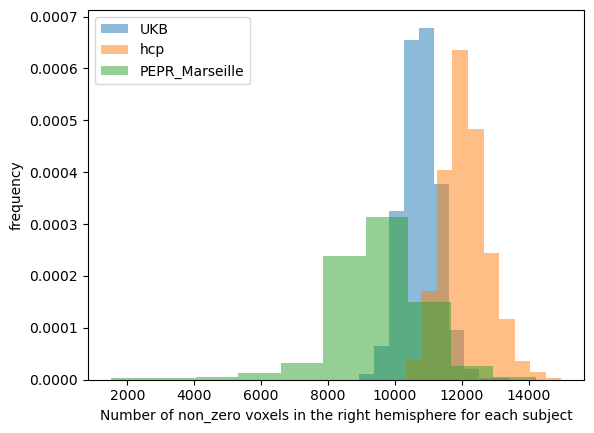

In [32]:
plt.hist(value_UKB_right, label="UKB", alpha=0.5, density=True)
plt.hist(value_hcp_right, label="hcp", alpha=0.5, density=True)
plt.hist(value_PEPR_right, label="PEPR_Marseille", alpha=0.5, density=True)
plt.xlabel("Number of non_zero voxels in the right hemisphere for each subject")
plt.ylabel("frequency")
plt.legend()
plt.show()

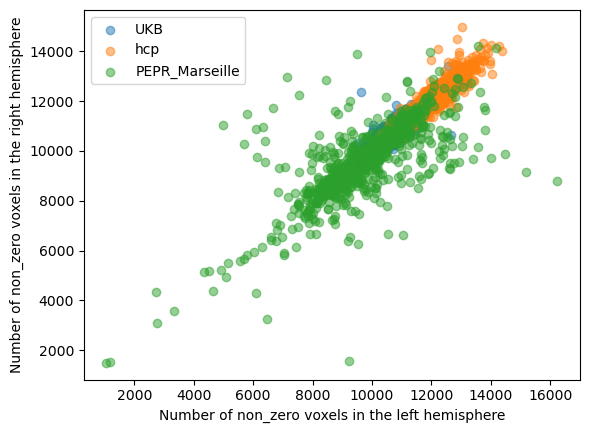

In [33]:
plt.scatter(value_UKB_left, value_UKB_right, alpha=0.5, label="UKB")
plt.scatter(value_hcp_left, value_hcp_right, alpha=0.5, label="hcp")
plt.scatter(value_PEPR_left, value_PEPR_right, alpha=0.5, label="PEPR_Marseille")
plt.xlabel("Number of non_zero voxels in the left hemisphere")
plt.ylabel("Number of non_zero voxels in the right hemisphere")
plt.legend()
plt.show()